In [2]:
# Import the modules
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd
import codecs

with codecs.open("Resources/DataCoSupplyChainDataset.csv", 'r', encoding='ISO-8859-1') as f:
    DataCO_df = pd.read_csv(f)


DataCO_df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


DATA CLEANING 

In [4]:
#show data type for each column
DataCO_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [5]:
#removing duplicate & unnecessary columns from the dataset 
#Drop "Customer Email","Customer Password", "Customer Street", "Customer Fname" , "Customer Lname", "Sales per customer" [the same as "Order Item Total"], "Benefit per order" [the same as "Order Profit Per Order"], "Product Description","Category Id" [the same as "Product Category Id"],"Product Image", "Product Status"
DataCO_df = DataCO_df.drop(columns=["Customer Email","Customer Password", "Customer Street", "Customer Fname" , "Customer Lname", "Sales per customer", "Benefit per order", "Product Description","Category Id", "Product Image", "Product Status"])
DataCO_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [6]:
#extract date without time from column "order date (DateOrders)" and create a new column order_date_VL in DataCO_df

DataCO_df['order_date_VL'] = pd.to_datetime(DataCO_df['order date (DateOrders)']).dt.date
DataCO_df.head(3)



,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_date_VL
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,2018-01-31
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,2018-01-13
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,2018-01-13


In [7]:
#show basic statistics for the dataframe
#DataCO_df.describe()

In [8]:
#save dataframe to csv file
DataCO_df.to_csv("Resources/DataCoSupplyChainDataset_VL.csv", index=False)


LINEAR REGRESSION - Sales Prediction Total 

A) DATA EXPLORATION 

In [9]:
#remove rows with "Order Satus" = "CANCELED"
DataCO_df = DataCO_df[DataCO_df['Order Status'] != 'CANCELED']
DataCO_df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_date_VL
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,2018-01-31
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,2018-01-13
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,2018-01-13


In [10]:
#DataCO_df.columns

In [11]:
#create a new dataframe with "order_date_VL" as index and sum of "Sales per customer" for each day
sales_df = DataCO_df.groupby(['order_date_VL'])['Order Item Total'].sum().reset_index()

#add a column with number of orders per day which is the number of unique "Order ID" for each day
sales_df['order_volume_VL'] = DataCO_df.groupby(['order_date_VL'])['Order Id'].nunique().reset_index()['Order Id']
#add a column with "order Profit Per Order" for each day
sales_df['profit_per_day_VL'] = DataCO_df.groupby(['order_date_VL'])['Order Profit Per Order'].sum().reset_index()['Order Profit Per Order']

#change the column names "Sales per customer" to "sales_per_day_VL"
sales_df = sales_df.rename(columns={"Order Item Total": "sales_per_day_VL"})
#edit format for "order_date_VL" column to date data type withour time
sales_df['order_date_VL'] = pd.to_datetime(sales_df['order_date_VL']).dt.date

sales_df.head(5)


,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL
0,2015-01-01,28958.730381,57,4361.270029
1,2015-01-02,25948.820225,52,1162.729983
2,2015-01-03,32859.300341,60,5366.600017
3,2015-01-04,31869.500330,62,5630.989989
4,2015-01-05,27533.050215,57,3088.100046


In [12]:
#create additional column with month and year
sales_df['month_year_VL'] = pd.to_datetime(sales_df['order_date_VL']).dt.to_period('M')
sales_df.head(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL,month_year_VL
0,2015-01-01,28958.730381,57,4361.270029,2015-01
1,2015-01-02,25948.820225,52,1162.729983,2015-01
2,2015-01-03,32859.300341,60,5366.600017,2015-01
3,2015-01-04,31869.500330,62,5630.989989,2015-01
4,2015-01-05,27533.050215,57,3088.100046,2015-01


In [13]:
#sales_df.dtypes

In [14]:
# Create a new dataframe grouped by "month_year_VL" and calculate the sum for "sales_per_day_VL" and "order_volume_VL"
sales_month_df = sales_df.groupby(['month_year_VL'])[['sales_per_day_VL', 'order_volume_VL','profit_per_day_VL']].sum().reset_index()

# Rename the column "sales_per_day_VL" to "sales_month_VL"
sales_month_df.rename(columns = {'sales_per_day_VL':'sales_month_VL'}, inplace=True)
#rename the column "profit_per_day_VL" to "profit_month_VL"
sales_month_df.rename(columns = {'profit_per_day_VL':'profit_month_VL'}, inplace=True)

# Convert "sales_month_VL" values to integers to remove decimals
sales_month_df['sales_month_VL'] = sales_month_df['sales_month_VL'].astype(int)

sales_month_df.head(5)

,month_year_VL,sales_month_VL,order_volume_VL,profit_month_VL
0,2015-01,930735,1757,108850.730153
1,2015-02,811256,1544,95591.310171
2,2015-03,926008,1742,109989.480207
3,2015-04,889407,1671,105021.689981
4,2015-05,919795,1734,109728.620148


In [15]:
sales_df.columns

Index(['order_date_VL', 'sales_per_day_VL', 'order_volume_VL',
       'profit_per_day_VL', 'month_year_VL'],
      dtype='object')

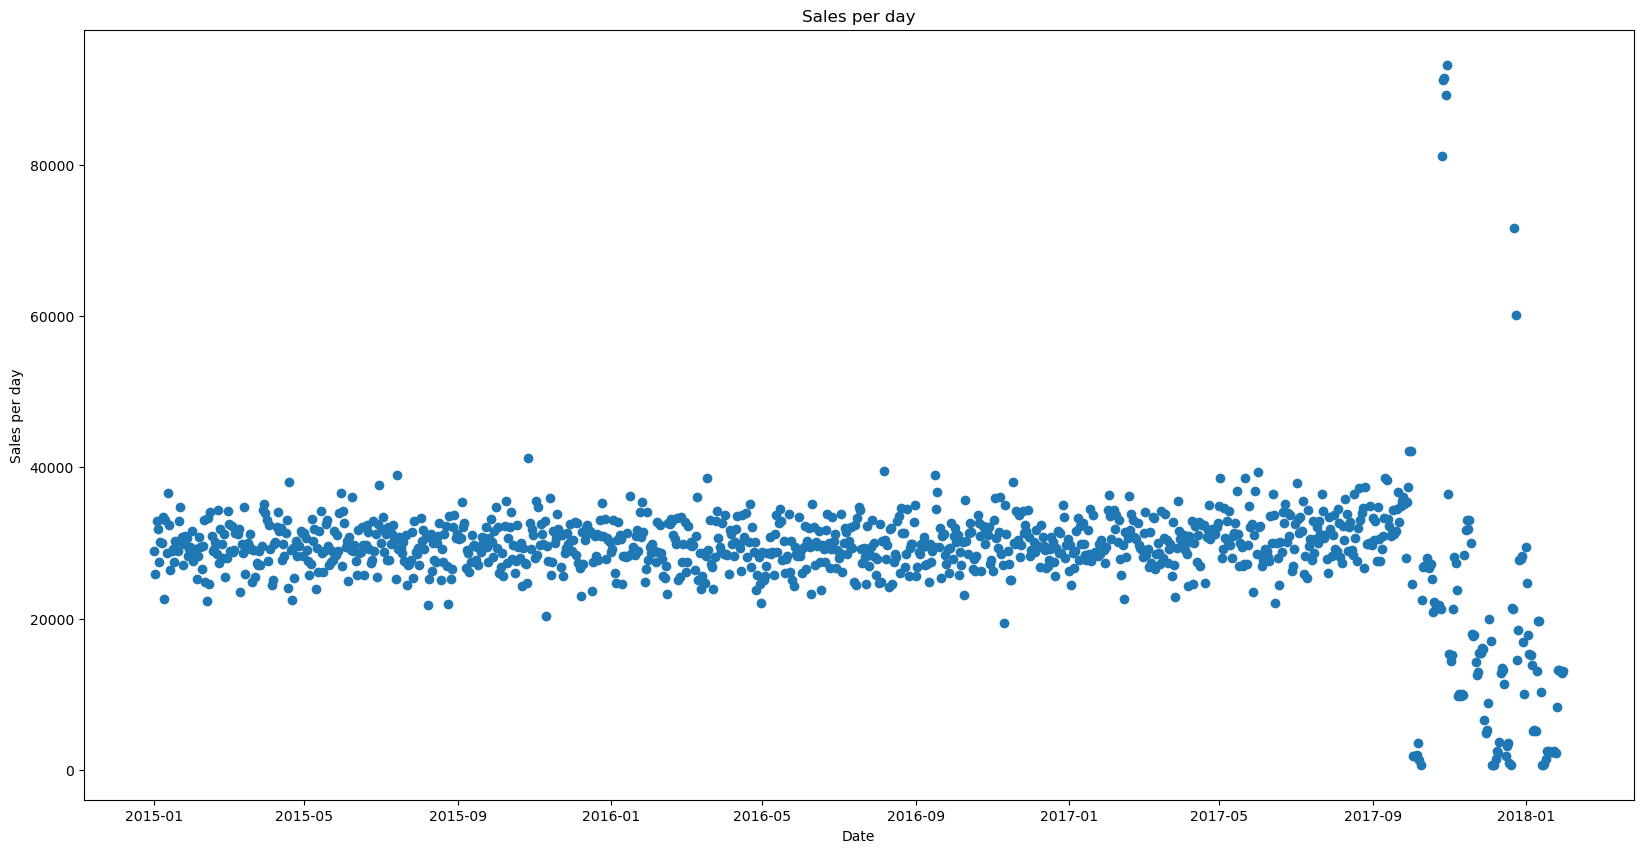

In [16]:
#plot the sales per day
plt.figure(figsize=(20,10))
plt.scatter(sales_df['order_date_VL'], sales_df['sales_per_day_VL'])
plt.xlabel('Date')
plt.ylabel('Sales per day')
plt.title('Sales per day')
plt.show()


Identified potential data issue after 2017-09 for daily sales analysis - 

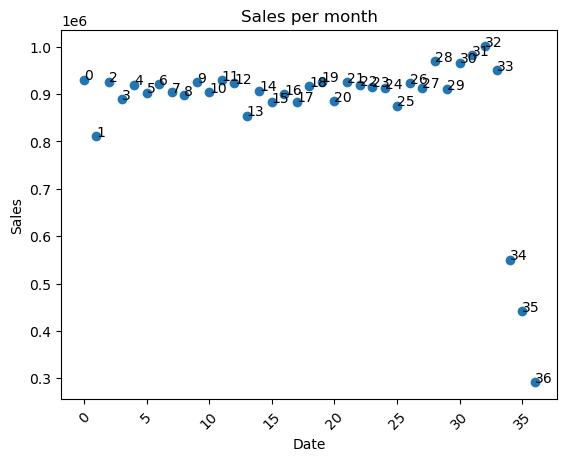

In [17]:
#plot the sales per month on a scatter plot by index
plt.scatter(sales_month_df.index, sales_month_df['sales_month_VL'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales per month')
#rotate the x-axis labels
plt.xticks(rotation=45)
#add labels with index numbers to the data points
for i in range(len(sales_month_df.index)):
    plt.annotate(i, (sales_month_df.index[i], sales_month_df['sales_month_VL'][i]))

plt.show()


Confirmed potential data collection issue going back to at least in 2017-11 [index=34 for monthly sales table] - sales after that period will be excluded from modeling for both monthly and daily sales model projection. 

In [18]:
#remove rows with month_year_VL index >=34 - possible data collection issue after this date - REFER TO THE SCATTERPLOT ABOVE
sales_month_df = sales_month_df[sales_month_df.index < 34]
sales_month_df.tail(5)


,month_year_VL,sales_month_VL,order_volume_VL,profit_month_VL
29,2017-06,910862,1649,109206.520298
30,2017-07,966172,1734,111801.590001
31,2017-08,981649,1738,129674.710207
32,2017-09,1000528,1679,119531.420149
33,2017-10,950735,2069,116524.559823


In [19]:
#remove rows from sales_df for dates after 2017-10-31
sales_df = sales_df[sales_df['order_date_VL'] < pd.to_datetime('2017-10-01').date()]
sales_df.tail(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL,month_year_VL
999,2017-09-26,35095.880340,57,4789.920092,2017-09
1000,2017-09-27,28064.610229,44,3414.190063,2017-09
1001,2017-09-28,35396.390255,56,5653.629964,2017-09
1002,2017-09-29,37348.870227,57,4848.889939,2017-09
1003,2017-09-30,42178.000117,59,3116.650037,2017-09


B) LINEAR REGRESSION - sales prediction based on order volume

In [20]:
#create a scatter plot of the sales volume versus profit per day
sales_plot = sales_df.hvplot.scatter(
    x='order_volume_VL', 
    y='sales_per_day_VL', 
    hover_cols=['order_date_VL'], 
    title='Order Volume vs Sales per Day'
    )

sales_plot

:Scatter   [order_volume_VL]   (sales_per_day_VL,order_date_VL)

In [21]:
#exclude outliers from the data - rows with sales_per_day_VL >3 standard deviations from the mean
sales_df = sales_df[sales_df['sales_per_day_VL'] < (sales_df['sales_per_day_VL'].mean() + 3*sales_df['sales_per_day_VL'].std())]
#exclude outliers from the data - rows with order_volume_VL >3 standard deviations from the mean
sales_df = sales_df[sales_df['order_volume_VL'] < (sales_df['order_volume_VL'].mean() + 3*sales_df['order_volume_VL'].std())]


In [22]:
X = sales_df["order_volume_VL"].values.reshape(-1, 1)
y = sales_df["sales_per_day_VL"].values.reshape(-1, 1)

In [23]:
#train the model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [24]:
# Predictions
y_pred = model.predict(X)

In [25]:
# R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

# MAE
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae}")

R-squared: 0.3487478499778356
RMSE: 2454.8976074955617
MAE: 1963.3672856074759


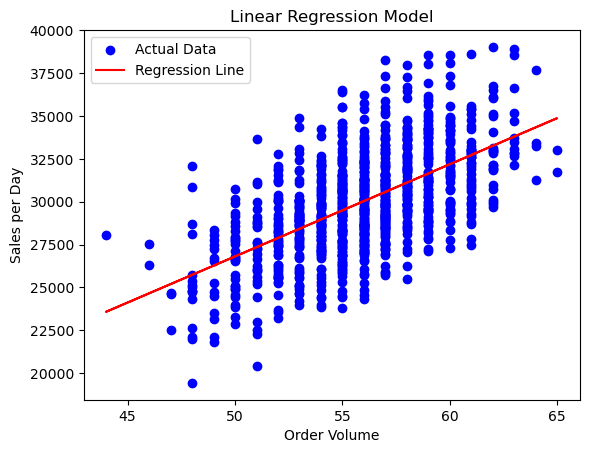

In [26]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Order Volume')
plt.ylabel('Sales per Day')
plt.legend()
plt.title('Linear Regression Model')
plt.show()


C) MULTIPLE REGRESSION Model intended to improve prediction of the model
--> Adding the total item quantity as a veriable 

In [27]:
#add a column with "Order Item Quantity" for each day
sales_df['item_qty_per_day_VL'] = DataCO_df.groupby(['order_date_VL'])['Order Item Quantity'].sum().reset_index()['Order Item Quantity']
sales_df.head(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL,month_year_VL,item_qty_per_day_VL
0,2015-01-01,28958.730381,57,4361.270029,2015-01,353
1,2015-01-02,25948.820225,52,1162.729983,2015-01,341
2,2015-01-03,32859.300341,60,5366.600017,2015-01,392
3,2015-01-04,31869.500330,62,5630.989989,2015-01,410
4,2015-01-05,27533.050215,57,3088.100046,2015-01,373


In [28]:
X = sales_df[['order_volume_VL','item_qty_per_day_VL']]


In [29]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [30]:
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R-squared: 0.5670810940206952
RMSE: 2001.5298608820697
MAE: 1552.7141464645706


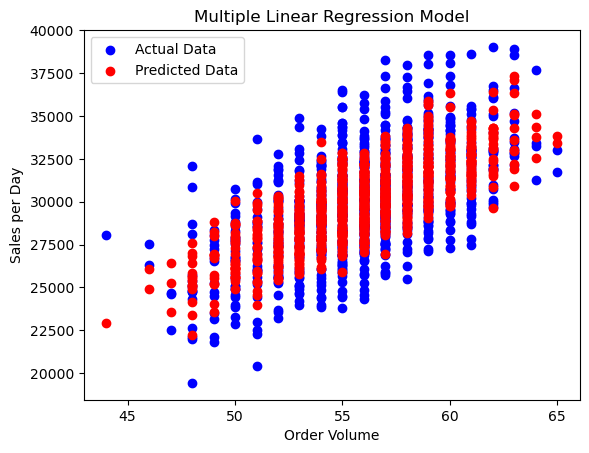

In [31]:
#plot the actual data versus the predicted data
plt.scatter(X['order_volume_VL'], y, color='blue', label='Actual Data')
plt.scatter(X['order_volume_VL'], y_pred, color='red', label='Predicted Data')
plt.xlabel('Order Volume')
plt.ylabel('Sales per Day')
plt.legend()
plt.title('Multiple Linear Regression Model')
plt.show()



D) Improving MULTIPLE REGRESSION model by adding additional variable - average daily discount 

In [32]:
#add a column with average "Order Item Discount Rate" for each day
sales_df['avg_discount_per_day_VL'] = DataCO_df.groupby(['order_date_VL'])['Order Item Discount Rate'].mean().reset_index()['Order Item Discount Rate'] 
sales_df.head(5)


,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL,month_year_VL,item_qty_per_day_VL,avg_discount_per_day_VL
0,2015-01-01,28958.730381,57,4361.270029,2015-01,353,0.114880
1,2015-01-02,25948.820225,52,1162.729983,2015-01,341,0.099664
2,2015-01-03,32859.300341,60,5366.600017,2015-01,392,0.092402
3,2015-01-04,31869.500330,62,5630.989989,2015-01,410,0.104241
4,2015-01-05,27533.050215,57,3088.100046,2015-01,373,0.113875


In [33]:
X = sales_df[['order_volume_VL','item_qty_per_day_VL','avg_discount_per_day_VL']]


In [34]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [35]:
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R-squared: 0.5707067478409564
RMSE: 1993.1309296880518
MAE: 1544.166006079209


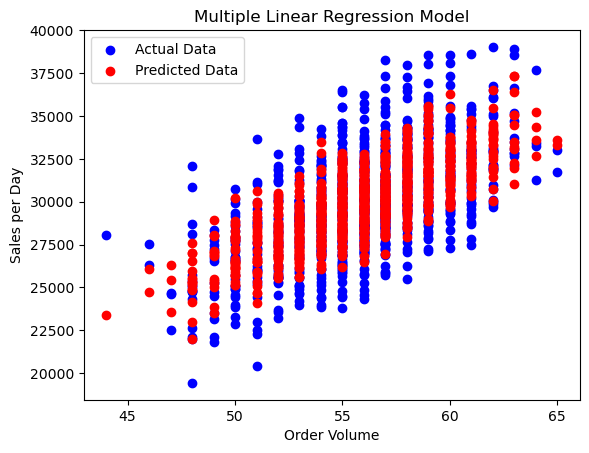

In [36]:
#plot the actual data versus the predicted data
plt.scatter(X['order_volume_VL'], y, color='blue', label='Actual Data')
plt.scatter(X['order_volume_VL'], y_pred, color='red', label='Predicted Data')
plt.xlabel('Order Volume')
plt.ylabel('Sales per Day')
plt.legend()
plt.title('Multiple Linear Regression Model')
plt.show()


Adding additional predictor variable - Order product Price Average 

In [37]:
#add a column with average "Order Item Product Price" for each day
sales_df['avg_product_price_per_day_VL'] = DataCO_df.groupby(['order_date_VL'])['Order Item Product Price'].mean().reset_index()['Order Item Product Price']
sales_df.head(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL,month_year_VL,item_qty_per_day_VL,avg_discount_per_day_VL,avg_product_price_per_day_VL
0,2015-01-01,28958.730381,57,4361.270029,2015-01,353,0.114880,136.668859
1,2015-01-02,25948.820225,52,1162.729983,2015-01,341,0.099664,124.169533
2,2015-01-03,32859.300341,60,5366.600017,2015-01,392,0.092402,136.982406
3,2015-01-04,31869.500330,62,5630.989989,2015-01,410,0.104241,123.622673
4,2015-01-05,27533.050215,57,3088.100046,2015-01,373,0.113875,121.256816


In [38]:
#load sales_df to csv file
sales_df.to_csv("Resources/sales_df_VL.csv", index=False)

########----- JESS COPY FROM BELOW -------------########

In [43]:
#read csv file to dataframe
sales_df = pd.read_csv("Resources/sales_df_VL.csv")
sales_df.head(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,profit_per_day_VL,month_year_VL,item_qty_per_day_VL,avg_discount_per_day_VL,avg_product_price_per_day_VL
0,2015-01-01,28958.730381,57,4361.270029,2015-01,353,0.114880,136.668859
1,2015-01-02,25948.820225,52,1162.729983,2015-01,341,0.099664,124.169533
2,2015-01-03,32859.300341,60,5366.600017,2015-01,392,0.092402,136.982406
3,2015-01-04,31869.500330,62,5630.989989,2015-01,410,0.104241,123.622673
4,2015-01-05,27533.050215,57,3088.100046,2015-01,373,0.113875,121.256816


In [39]:
X = sales_df[['order_volume_VL','item_qty_per_day_VL','avg_discount_per_day_VL','avg_product_price_per_day_VL']]


In [40]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [41]:
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R-squared: 0.9452063923653357
RMSE: 712.0717319595923
MAE: 550.7522186313083


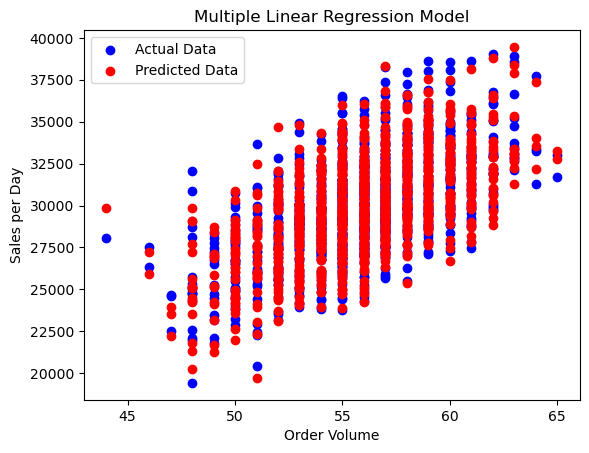

In [42]:
#plot the actual data versus the predicted data
plt.scatter(X['order_volume_VL'], y, color='blue', label='Actual Data')
plt.scatter(X['order_volume_VL'], y_pred, color='red', label='Predicted Data')
plt.xlabel('Order Volume')
plt.ylabel('Sales per Day')
plt.legend()
plt.title('Multiple Linear Regression Model')
plt.show()

